In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tobiasbueck/multilingual-customer-support-tickets")

print("Path to dataset files:", path)

100%|██████████| 16.1M/16.1M [00:00<00:00, 54.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/12


In [ ]:
!apt-get install tree

!tree -a "/root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/12"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (164 kB/s)
Selecting previously unselected package tree.
(Reading database ... 126374 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
/root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/12
├── aa_dataset-tickets-multi-lang-5-2-50-version.csv
├── dataset-tickets-german_normalized_50_5_2.csv
├── dataset-tickets-german_normalized.csv
├── dataset-tickets-multi-lang3-4k.csv
└── dataset

In [ ]:
import pandas as pd

df = pd.read_csv(path + "/aa_dataset-tickets-multi-lang-5-2-50-version.csv")
df.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN


In [ ]:
df = df[df['language'] == 'en']
df.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN
5,Feature Query,"Dear Customer Support,\n\nI hope this message ...",Thank you for your inquiry. Please specify whi...,Request,Technical Support,high,en,51,Feature,Product,Documentation,Feedback,NaN,NaN,NaN,NaN


In [ ]:
df['priority'].value_counts()

,count
priority,
medium,6618
high,6346
low,3374


In [ ]:
df = df[['subject', 'body', 'priority']]

### Exploratory Data Analysis and Data Cleaning

In [ ]:
df.describe(include='all')

,subject,body,priority
count,13731,16338,16338
unique,13731,16338,3
top,Inquiry About Project Management Features,Looking for detailed information on the projec...,medium
freq,1,1,6618


In [ ]:
df.isnull().sum()

,0
subject,2607
body,0
priority,0


In [ ]:
# Filter rows where 'subject' is null
df_null_subject = df[df['subject'].isnull()]

# Print the value_counts of 'consolidated_category' for these rows
print("Distribution of 'priority' for rows with null 'subject':")
print(df_null_subject['priority'].value_counts())

Distribution of 'priority' for rows with null 'subject':
priority
high      1042
medium    1023
low        542
Name: count, dtype: int64


In [ ]:
df.dropna(subset=['subject'], inplace=True)
df['priority'].value_counts()

,count
priority,
medium,5595
high,5304
low,2832


In [ ]:
df['priority'].unique()

array(['high', 'medium', 'low'], dtype=object)

In [ ]:
df['subject'].unique()

array(['Account Disruption',
       'Query About Smart Home System Integration Features',
       'Inquiry Regarding Invoice Details', ...,
       'Performance Problem with Data Analytics Tool',
       'Update Request for SaaS Platform Integration Features',
       'Inquiry About Project Management Features'], dtype=object)

In [ ]:
df['subject'].value_counts()

,count
subject,
Inquiry About Project Management Features,1
Account Disruption,1
Query About Smart Home System Integration Features,1
Scalability Features in Project Management,1
Exploring Digital Strategies for Brand Growth and Online Development,1
...,...
VPN Access Issue,1
Connectivity Problems with Printer on MacBook Pro,1
System Interruptions,1


In [ ]:
df.shape

(13731, 3)

In [ ]:
new_df = df.copy()
new_df.head()

,subject,body,priority
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...",high
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",medium
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",low
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",medium
5,Feature Query,"Dear Customer Support,\n\nI hope this message ...",high


In [ ]:
new_df['priority'].value_counts()

,count
priority,
medium,5595
high,5304
low,2832


In [ ]:
print(f"Number of duplicate rows: {new_df.duplicated().sum()}")
display(new_df[new_df.duplicated(keep=False)].sort_index())

Number of duplicate rows: 0


,subject,body,priority


In [ ]:
new_df.shape

(13731, 3)

In [ ]:
new_df = new_df.drop_duplicates()
print(f"Number of duplicate rows after removal: {new_df.duplicated().sum()}")
new_df.shape

Number of duplicate rows after removal: 0


(13731, 3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Average description length (characters): 357.90
Average description length (words): 52.35
Average description length (sentences): 3.64


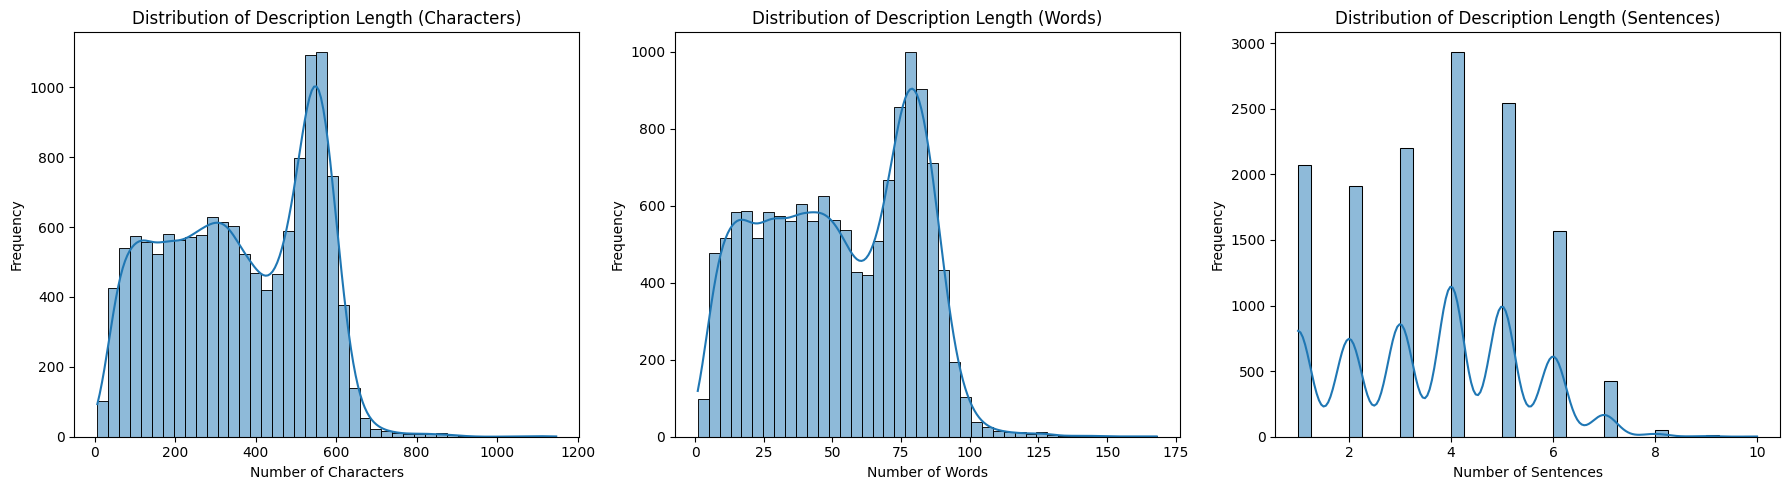

In [ ]:
import nltk
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

# Calculate description length in characters
new_df['description_length_chars'] = new_df['body'].apply(len)

# Calculate description length in words
new_df['description_length_words'] = new_df['body'].apply(lambda x: len(x.split()))

# Calculate description length in sentences
new_df['description_length_sentences'] = new_df['body'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Print average lengths
print(f"Average description length (characters): {new_df['description_length_chars'].mean():.2f}")
print(f"Average description length (words): {new_df['description_length_words'].mean():.2f}")
print(f"Average description length (sentences): {new_df['description_length_sentences'].mean():.2f}")

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(new_df['description_length_chars'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of Description Length (Characters)')
axes[0].set_xlabel('Number of Characters')
axes[0].set_ylabel('Frequency')

sns.histplot(new_df['description_length_words'], ax=axes[1], kde=True)
axes[1].set_title('Distribution of Description Length (Words)')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

sns.histplot(new_df['description_length_sentences'], ax=axes[2], kde=True)
axes[2].set_title('Distribution of Description Length (Sentences)')
axes[2].set_xlabel('Number of Sentences')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Data Preprocessing

In [ ]:
new_df['full_text'] = new_df['body']
new_df.head()

,subject,body,priority,description_length_chars,description_length_words,description_length_sentences,full_text,processed_text,tokens
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...",high,544,82,4,"Dear Customer Support Team,\n\nI am writing to...",account disruption write report significant pr...,"[account, disruption, write, report, significa..."
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",medium,534,76,3,"Dear Customer Support Team,\n\nI hope this mes...",query smart home system integration feature ho...,"[query, smart, home, system, integration, feat..."
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",low,605,91,4,"Dear Customer Support Team,\n\nI hope this mes...",inquiry regard invoice detail hope message fin...,"[inquiry, regard, invoice, detail, hope, messa..."
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",medium,677,97,4,"Dear Support Team,\n\nI hope this message reac...",question marketing agency software compatibili...,"[question, marketing, agency, software, compat..."
5,Feature Query,"Dear Customer Support,\n\nI hope this message ...",high,646,97,6,"Dear Customer Support,\n\nI hope this message ...",feature query hope message reach good health e...,"[feature, query, hope, message, reach, good, h..."


# ✍️ Text Preprocessing Pipeline Explained

Here's a breakdown of each step in the `perfect_preprocess_text` function. This pipeline is designed to clean raw text and transform it into a useful format for machine learning models, especially for tasks like issue classification.

---

## 1. Convert to Lowercase
* **What it does:** Converts all characters in the text to lowercase.
* **Why it's important:** This ensures consistency. The model will treat **"Error"**, **"error"**, and **"ERROR"** as the same word, preventing it from thinking they are three different things.

`"My Account IS LOCKED!"` → `"my account is locked!"`

---

## 2. Aggressive Noise Removal (with Regex)
* **What it does:** Uses Regular Expressions (regex)—special patterns for finding and matching text—to remove common "noise" that isn't useful for understanding the core message.
* **We remove:**
    * **URLs & Emails:** `http://...`, `www...`, `user@example.com`
    * **HTML Tags:** `<p>`, `<div>`, `<b>`
    * **Phone Numbers:** `1-800-555-1234`
    * **Long IDs/Codes:** `f2f5f6fd1234567890abcdef`
* **Why it's important:** These elements are specific to one user or instance and don't help the model learn general patterns about issue types. Removing them cleans the data significantly.

---

## 3. Remove Non-Alphabetic Characters
* **What it does:** Removes any character that is not a letter (`a-z`) or a space.
* **Why it's important:** This gets rid of all remaining punctuation (`!`, `?`, `.`), numbers, and special symbols (`😠`, `#`, `$`). This leaves us with only the words themselves.

`"my account is locked! 😠"` → `"my account is locked "`

---

## 4. Tokenization
* **What it does:** Splits the cleaned string of text into a list of individual words, or "**tokens**".
* **Why it's important:** Machine learning models work with words, not long strings. Tokenization is the fundamental step of breaking down sentences into their component parts so we can analyze each one.



`"my account is locked"` → `['my', 'account', 'is', 'locked']`

---

## 5. Part-of-Speech (POS) Tagging
* **What it does:** Analyzes the list of tokens and assigns a "**Part of Speech**" tag to each one (e.g., noun, verb, adjective).
* **Why it's important:** This step is a prerequisite for accurate lemmatization. Knowing that "working" is a verb allows the lemmatizer to correctly find its root form, "work".

`['account', 'is', 'locked']` → `[('account', 'NN'), ('is', 'VBZ'), ('locked', 'VBN')]`
*(NN=Noun, VBZ=Verb, VBN=Verb)*

---

## 6. POS-Aware Lemmatization
* **What it does:** Reduces each word to its base or dictionary form, called a "**lemma**," using the POS tag for context.
* **Why it's important:** This groups different forms of a word into a single concept. For example, **"works"**, **"working"**, and **"worked"** all get converted to **"work"**. This helps the model understand that all these words refer to the same idea, which is much more powerful than treating them as three separate words.

`[('locked', 'VBN')]` → `'lock'`

---

## 7. Remove Stop Words & Short Words
* **What it does:** Filters the list of lemmatized tokens to remove:
    * **Standard Stop Words:** Common words with little meaning, like "the", "a", "is", "in".
    * **Custom Stop Words:** Words you've defined as common but unhelpful for your specific data (e.g., `product`, `item`, `customer`).
    * **Short Words:** Any remaining tokens with 1 or 2 letters, which are often just noise.
* **Why it's important:** This step removes the "fluff" and focuses the dataset on the words that truly describe the issue. We specifically keep **negations** (like "not") because they are critical for understanding the problem (e.g., "not working").

`['my', 'account', 'be', 'lock']` → `['account', 'lock']`
*(Here, 'my' and 'be' are removed as stopwords)*

---

## 8. Join Tokens Back into a String
* **What it does:** The final step joins the clean, processed tokens back into a single string with spaces in between.
* **Why it's important:** This creates the final `processed_text` which is a clean, feature-rich representation of the original text, ready to be fed into a machine learning model.

`['account', 'lock']` → `"account lock"`

In [ ]:
# Get all words from the 'full_text' column
all_full_words = new_df['full_text'].str.split(expand=True).stack()

# Get unique words
unique_full_words = all_full_words.unique()

print(len(unique_full_words))

10697


In [ ]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd

# --- Simplified & More Direct NLTK Data Downloads ---
# This approach directly calls the downloader for each package to ensure
# they are correctly installed and registered in your environment.
try:
    print("Downloading NLTK resources...")
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('averaged_perceptron_tagger', quiet=True)
    nltk.download('averaged_perceptron_tagger_eng', quiet=True) # Added this line
    print("All necessary NLTK resources are downloaded.")
except Exception as e:
    print(f"An error occurred during NLTK download: {e}")


# --- Initialization ---
lemmatizer = WordNetLemmatizer()

# --- Stop Words Strategy ---
stop_words = set(stopwords.words('english'))
negations = {'no', 'not', 'nor', 'neither', "don't", "isn't", "wasn't", "shouldn't", "wouldn't", "couldn't"}
useless_words = {'dear', 'customer', 'support', 'team', 'NaN', 'null', 'NA', 'issue'}
stop_words = stop_words.union(useless_words)
stop_words = stop_words - negations

# --- Helper Function for POS-aware Lemmatization ---
def get_wordnet_pos(treebank_tag):
    """Maps NLTK POS tags to WordNet POS tags."""
    if not treebank_tag: # Added this check
        return wordnet.NOUN # Default to noun if no tag is found
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# --- The Main Preprocessing Function ---
def perfect_preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'(https?|ftp)://[^\s/$.?#].[^\s]*|www\.\S+|(\S+@\S+)|([a-z]:\\[^\s:]+)', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'\b(?:\d[ -]?){6,12}\d\b', ' ', text)
    text = re.sub(r'\b[a-z0-9]{20,}\b', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    processed_tokens = [
        word for word in lemmatized_tokens if word not in stop_words and len(word) > 2
    ]
    return " ".join(processed_tokens).strip()

# Apply the new, perfected function
new_df['processed_text'] = new_df['full_text'].apply(perfect_preprocess_text)

new_df[['full_text', 'processed_text']].head()

All necessary NLTK resources are downloaded.


,full_text,processed_text
1,"Dear Customer Support Team,\n\nI am writing to...",write report significant problem centralized a...
2,"Dear Customer Support Team,\n\nI hope this mes...",hope message reach well reach request detailed...
3,"Dear Customer Support Team,\n\nI hope this mes...",hope message find well reach request clarifica...
4,"Dear Support Team,\n\nI hope this message reac...",hope message reach well reach ask compatibilit...
5,"Dear Customer Support,\n\nI hope this message ...",hope message reach good health eager learn fea...


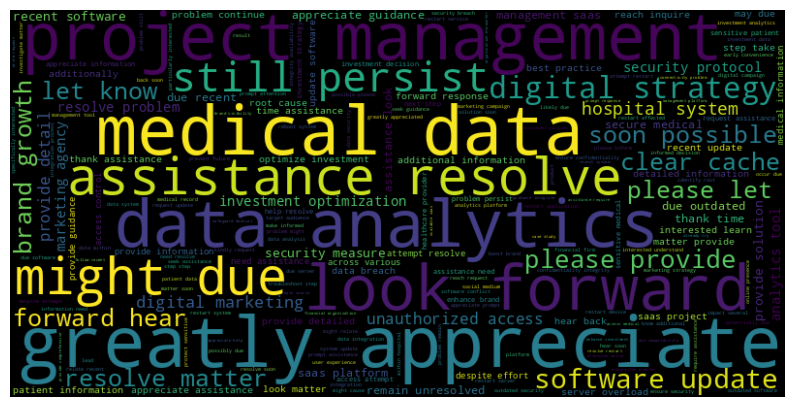

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the processed text into a single string
all_processed_text = " ".join(new_df['processed_text'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_processed_text)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

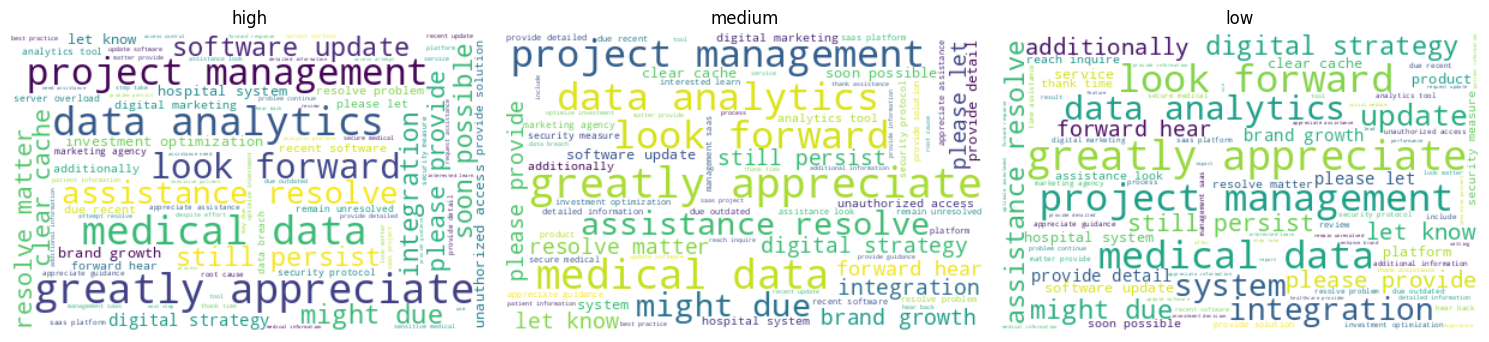

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get unique categories
unique_categories = new_df['priority'].unique()

# Determine grid size (simple approach: square-like grid)
n_categories = len(unique_categories)
n_cols = 3 # You can adjust the number of columns
n_rows = (n_categories + n_cols - 1) // n_cols # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Generate and display word cloud for each category
for i, category in enumerate(unique_categories):
    # Filter data for the current category
    category_text = " ".join(new_df[new_df['priority'] == category]['processed_text'].dropna())

    # Generate word cloud
    wordcloud = WordCloud(width=400, height=250, background_color='white').generate(category_text)

    # Display on the corresponding subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(category)
    axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

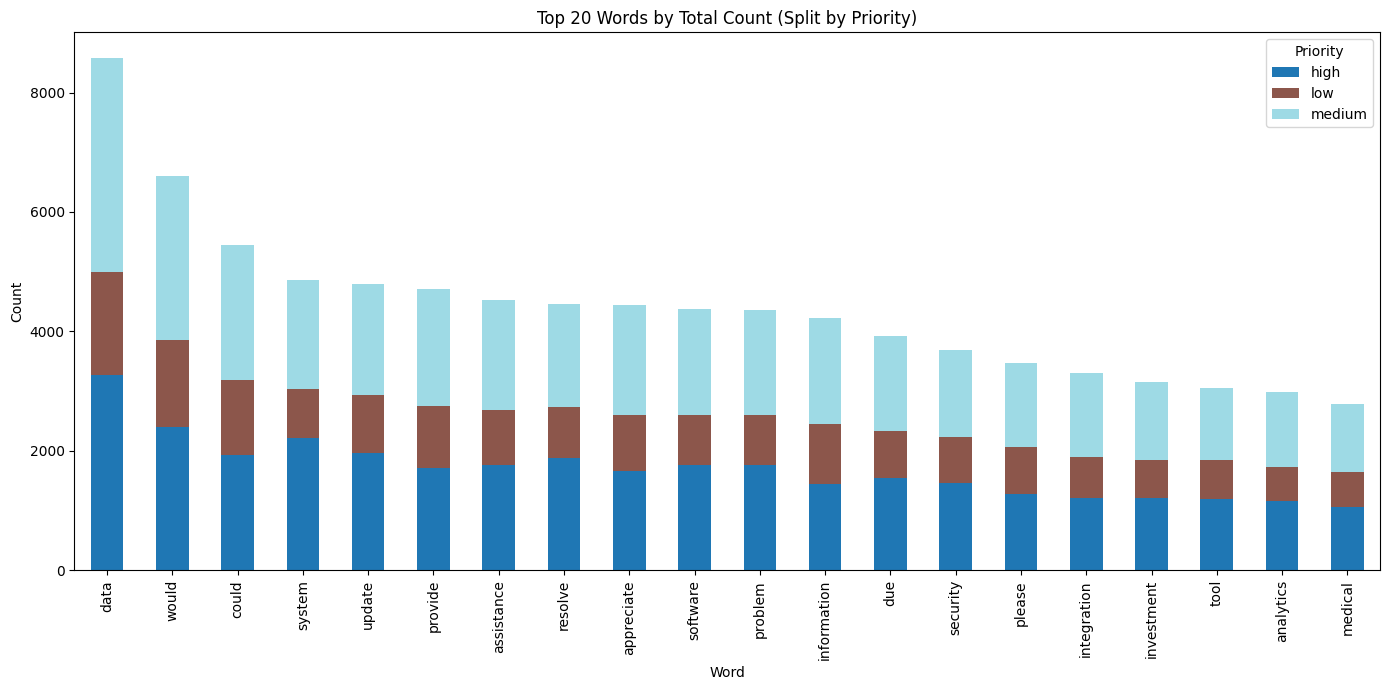

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Split text into words for each row
new_df["tokens"] = new_df["processed_text"].str.split()

# Step 2: Create a list of (word, priority) pairs
rows = []
for _, row in new_df.iterrows():
    priority = row["priority"]
    for word in row["tokens"]:
        rows.append((word, priority))

# Step 3: Convert into DataFrame
word_cat_df = pd.DataFrame(rows, columns=["word", "priority"])

# Step 4: Count word-priority occurrences
word_counts = (
    word_cat_df
    .groupby(["word", "priority"])
    .size()
    .reset_index(name="count")
)

# Step 5: Pivot so priority become columns
pivot_counts = word_counts.pivot(index="word", columns="priority", values="count").fillna(0)

# Step 6: Add total counts per word
pivot_counts["total"] = pivot_counts.sum(axis=1)

# Step 7: Sort by total counts
pivot_counts = pivot_counts.sort_values("total", ascending=False)

# Step 8: Plot stacked bar chart
pivot_counts.drop(columns="total").head(20).plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    colormap="tab20"  # better color palette
)

plt.title("Top 20 Words by Total Count (Split by Priority)")
plt.xlabel("Word")
plt.ylabel("Count")
plt.legend(title="Priority")
plt.tight_layout()
plt.show()


In [ ]:
# Get all words from the 'processed_text' column
all_full_words = new_df['processed_text'].str.split(expand=True).stack()

# Get unique words
unique_full_words = all_full_words.unique()

print(len(unique_full_words))

3633


# Task
Apply BOW, Ngrams, TF/IDF and Word2Vec(pretrained) with Naive Bayes, Random Forest, XGBoost, LightGBM and display metrics of all combinations of these components to compare with each other and give in different cells. The features column is 'processed_text' and the target column is 'Ticket Type'.

## Define vectorization techniques

### Subtask:
Define the vectorizers for BOW, N-grams, TF-IDF, and Word2Vec.


**Reasoning**:
Instantiate the vectorizers for BOW, N-grams, and TF-IDF as described in the instructions. Word2Vec will be handled separately.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Instantiate CountVectorizer for BOW
bow_vectorizer = CountVectorizer()

# Instantiate CountVectorizer for N-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))

# Instantiate TfidfVectorizer for TF-IDF
tfidf_vectorizer = TfidfVectorizer()

## Apply vectorization

### Subtask:
Apply each vectorization technique (BOW, N-grams, TF-IDF) to the `processed_text` feature to transform the text data into numerical representations.


**Reasoning**:
Apply BOW, N-grams, and TF-IDF vectorization to the training and testing data.



## SMOTE Approach for handling Imbalanced classes

In [ ]:
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# import pandas as pd

# # Split the data into training and testing sets
# X = new_df['processed_text']
# y = new_df['priority']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# smote = SMOTE(random_state=42)

# vectorizations = {}

# # Apply BOW vectorization and then SMOTE
# bow_vectorizer = CountVectorizer()
# X_train_bow = bow_vectorizer.fit_transform(X_train)
# X_test_bow = bow_vectorizer.transform(X_test)
# X_train_bow_resampled, y_train_bow_resampled = smote.fit_resample(X_train_bow, y_train)
# vectorizations['BOW'] = (X_train_bow_resampled, X_test_bow, y_train_bow_resampled)


# # Apply N-grams vectorization and then SMOTE
# ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))
# X_train_ngram = ngram_vectorizer.fit_transform(X_train)
# X_test_ngram = ngram_vectorizer.transform(X_test)
# X_train_ngram_resampled, y_train_ngram_resampled = smote.fit_resample(X_train_ngram, y_train)
# vectorizations['N-gram'] = (X_train_ngram_resampled, X_test_ngram, y_train_ngram_resampled)


# # Apply TF-IDF vectorization and then SMOTE
# tfidf_vectorizer = TfidfVectorizer()
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# X_test_tfidf = tfidf_vectorizer.transform(X_test)
# X_train_tfidf_resampled, y_train_tfidf_resampled = smote.fit_resample(X_train_tfidf, y_train)
# vectorizations['TF-IDF'] = (X_train_tfidf_resampled, X_test_tfidf, y_train_tfidf_resampled)


# print("Vectorization and SMOTE complete.")

## Without SMOTE Approach

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = new_df['processed_text']
y = new_df['priority']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Apply BOW vectorization
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Apply N-grams vectorization
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_ngram = ngram_vectorizer.fit_transform(X_train)
X_test_ngram = ngram_vectorizer.transform(X_test)

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

vectorizations = {
    'BOW': (X_train_bow, X_test_bow),
    'N-gram': (X_train_ngram, X_test_ngram),
    'TF-IDF': (X_train_tfidf, X_test_tfidf)
}

print("Vectorization complete.")

Vectorization complete.


## Define models

### Subtask:
Define the classification models (Naive Bayes, Random Forest, XGBoost, LightGBM).


**Reasoning**:
Import the necessary classification libraries and instantiate the models as instructed.



## Without SMOTE Approach

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Instantiate the models
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced')
}

print("Classification models defined.")

Classification models defined.


## SMOTE Approach

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# # Instantiate the models
# models = {
#     'Naive Bayes': MultinomialNB(),
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'XGBoost': XGBClassifier(),
#     'LightGBM': LGBMClassifier(random_state=42)
# }

# print("Classification models defined.")

## Train and evaluate models

### Subtask:
Train each defined model using the vectorized data from each vectorization technique (BOW, N-grams, TF-IDF) and evaluate their performance using accuracy and a classification report. Word2Vec will be handled separately.


**Reasoning**:
Train each model on the vectorized data and evaluate their performance.



**Reasoning**:
The error indicates that XGBoost expects numerical labels, not string labels. I need to encode the target variable 'Ticket Type' into numerical categories before training XGBoost and LightGBM models.



**Reasoning**:
The error message indicates that LightGBM expects the input data to be of float type (np.float32 or np.float64), but the vectorized data (from `CountVectorizer`) is currently of integer type (int64). I need to convert the data types of the vectorized data to float before training LightGBM.



## SMOTE Approach

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import LabelEncoder

# # Encode the target variable
# label_encoder = LabelEncoder()
# # Use the original y_train and y_test for encoding
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# results = {}

# # Unpack all three elements from the vectorizations dictionary
# for vec_name, (X_train_vec, X_test_vec, y_train_vec) in vectorizations.items():
#     # Convert data type to float for LightGBM and potentially XGBoost
#     if vec_name in ['BOW', 'N-gram']: # CountVectorizer outputs integer sparse matrices
#         X_train_vec = X_train_vec.astype('float32')
#         X_test_vec = X_test_vec.astype('float32')


#     for model_name, model in models.items():
#         print(f"Training {model_name} with {vec_name} vectorization...")

#         if model_name in ['XGBoost', 'LightGBM']:
#             # Use encoded and resampled labels for XGBoost and LightGBM
#             y_train_vec_encoded = label_encoder.transform(y_train_vec) # Encode the resampled labels
#             model.fit(X_train_vec, y_train_vec_encoded)
#             y_pred = model.predict(X_test_vec)
#             accuracy = accuracy_score(y_test_encoded, y_pred)
#             report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_) # Use original class names for report
#         else:
#             # Use original and resampled labels for other models
#             model.fit(X_train_vec, y_train_vec)
#             y_pred = model.predict(X_test_vec)
#             accuracy = accuracy_score(y_test, y_pred)
#             report = classification_report(y_test, y_pred)


#         results[f'{vec_name}_{model_name}'] = {
#             'accuracy': accuracy,
#             'report': report
#         }
#         print(f"Finished training and evaluating {model_name} with {vec_name}. Accuracy: {accuracy:.4f}")

## Without SMOTE

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

results = {}

for vec_name, (X_train_vec, X_test_vec) in vectorizations.items():
    # Convert data type to float for LightGBM and potentially XGBoost
    if vec_name in ['BOW', 'N-gram']: # CountVectorizer outputs integer sparse matrices
        X_train_vec = X_train_vec.astype('float32')
        X_test_vec = X_test_vec.astype('float32')


    for model_name, model in models.items():
        print(f"Training {model_name} with {vec_name} vectorization...")

        if model_name in ['XGBoost', 'LightGBM']:
            # Use encoded labels for XGBoost and LightGBM
            model.fit(X_train_vec, y_train_encoded)
            y_pred = model.predict(X_test_vec)
            accuracy = accuracy_score(y_test_encoded, y_pred)
            report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_) # Use original class names for report
        else:
            # Use original labels for other models
            model.fit(X_train_vec, y_train)
            y_pred = model.predict(X_test_vec)
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred)


        results[f'{vec_name}_{model_name}'] = {
            'accuracy': accuracy,
            'report': report
        }
        print(f"Finished training and evaluating {model_name} with {vec_name}. Accuracy: {accuracy:.4f}")

Training Naive Bayes with BOW vectorization...
Finished training and evaluating Naive Bayes with BOW. Accuracy: 0.4558
Training Random Forest with BOW vectorization...
Finished training and evaluating Random Forest with BOW. Accuracy: 0.7317
Training XGBoost with BOW vectorization...
Finished training and evaluating XGBoost with BOW. Accuracy: 0.5788
Training LightGBM with BOW vectorization...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 10984, number of used features: 1177
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Finished training and evaluating LightGBM with BOW. Accuracy: 0.5522
Training Naive Ba

## Display results

### Subtask:
Display the metrics (accuracy and classification report) for each combination of vectorization technique and model in separate cells.


**Reasoning**:
Iterate through the results dictionary and display the accuracy and classification report for each combination of vectorization and model.



In [ ]:
from IPython.display import display, Markdown

for key, metrics in results.items():
    vectorizer, model_name = key.split('_', 1) # Split the key into vectorizer and model name
    markdown_header = f"### Results for {vectorizer} with {model_name}:"
    display(Markdown(markdown_header))
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['report'])
    print("-" * 60) # Separator for clarity

### Results for BOW with Naive Bayes:

Accuracy: 0.4558
Classification Report:
              precision    recall  f1-score   support

        high       0.48      0.55      0.51      1061
         low       0.34      0.30      0.32       567
      medium       0.48      0.44      0.46      1119

    accuracy                           0.46      2747
   macro avg       0.43      0.43      0.43      2747
weighted avg       0.45      0.46      0.45      2747

------------------------------------------------------------


### Results for BOW with Random Forest:

Accuracy: 0.7317
Classification Report:
              precision    recall  f1-score   support

        high       0.73      0.77      0.75      1061
         low       0.90      0.52      0.66       567
      medium       0.69      0.80      0.74      1119

    accuracy                           0.73      2747
   macro avg       0.77      0.70      0.72      2747
weighted avg       0.75      0.73      0.73      2747

------------------------------------------------------------


### Results for BOW with XGBoost:

Accuracy: 0.5788
Classification Report:
              precision    recall  f1-score   support

        high       0.63      0.59      0.61      1061
         low       0.71      0.24      0.36       567
      medium       0.53      0.74      0.62      1119

    accuracy                           0.58      2747
   macro avg       0.62      0.52      0.53      2747
weighted avg       0.61      0.58      0.56      2747

------------------------------------------------------------


### Results for BOW with LightGBM:

Accuracy: 0.5522
Classification Report:
              precision    recall  f1-score   support

        high       0.64      0.54      0.59      1061
         low       0.41      0.59      0.48       567
      medium       0.59      0.55      0.57      1119

    accuracy                           0.55      2747
   macro avg       0.55      0.56      0.55      2747
weighted avg       0.57      0.55      0.56      2747

------------------------------------------------------------


### Results for N-gram with Naive Bayes:

Accuracy: 0.5967
Classification Report:
              precision    recall  f1-score   support

        high       0.60      0.67      0.63      1061
         low       0.65      0.31      0.42       567
      medium       0.58      0.68      0.63      1119

    accuracy                           0.60      2747
   macro avg       0.61      0.55      0.56      2747
weighted avg       0.60      0.60      0.59      2747

------------------------------------------------------------


### Results for N-gram with Random Forest:

Accuracy: 0.7230
Classification Report:
              precision    recall  f1-score   support

        high       0.74      0.77      0.75      1061
         low       0.93      0.45      0.61       567
      medium       0.67      0.82      0.74      1119

    accuracy                           0.72      2747
   macro avg       0.78      0.68      0.70      2747
weighted avg       0.75      0.72      0.72      2747

------------------------------------------------------------


### Results for N-gram with XGBoost:

Accuracy: 0.5832
Classification Report:
              precision    recall  f1-score   support

        high       0.64      0.60      0.62      1061
         low       0.73      0.21      0.32       567
      medium       0.53      0.76      0.62      1119

    accuracy                           0.58      2747
   macro avg       0.63      0.52      0.52      2747
weighted avg       0.61      0.58      0.56      2747

------------------------------------------------------------


### Results for N-gram with LightGBM:

Accuracy: 0.5657
Classification Report:
              precision    recall  f1-score   support

        high       0.64      0.59      0.61      1061
         low       0.44      0.59      0.50       567
      medium       0.59      0.53      0.56      1119

    accuracy                           0.57      2747
   macro avg       0.56      0.57      0.56      2747
weighted avg       0.58      0.57      0.57      2747

------------------------------------------------------------


### Results for TF-IDF with Naive Bayes:

Accuracy: 0.4740
Classification Report:
              precision    recall  f1-score   support

        high       0.50      0.53      0.51      1061
         low       0.46      0.06      0.10       567
      medium       0.46      0.63      0.53      1119

    accuracy                           0.47      2747
   macro avg       0.47      0.41      0.38      2747
weighted avg       0.47      0.47      0.44      2747

------------------------------------------------------------


### Results for TF-IDF with Random Forest:

Accuracy: 0.7040
Classification Report:
              precision    recall  f1-score   support

        high       0.71      0.73      0.72      1061
         low       0.87      0.45      0.59       567
      medium       0.66      0.80      0.72      1119

    accuracy                           0.70      2747
   macro avg       0.75      0.66      0.68      2747
weighted avg       0.72      0.70      0.70      2747

------------------------------------------------------------


### Results for TF-IDF with XGBoost:

Accuracy: 0.5868
Classification Report:
              precision    recall  f1-score   support

        high       0.63      0.61      0.62      1061
         low       0.67      0.26      0.37       567
      medium       0.55      0.73      0.62      1119

    accuracy                           0.59      2747
   macro avg       0.61      0.53      0.54      2747
weighted avg       0.60      0.59      0.57      2747

------------------------------------------------------------


### Results for TF-IDF with LightGBM:

Accuracy: 0.5795
Classification Report:
              precision    recall  f1-score   support

        high       0.64      0.57      0.61      1061
         low       0.46      0.58      0.51       567
      medium       0.60      0.58      0.59      1119

    accuracy                           0.58      2747
   macro avg       0.57      0.58      0.57      2747
weighted avg       0.59      0.58      0.58      2747

------------------------------------------------------------


### Testing only on the body of the set having subject as null which was excluded from train and test set as well

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Filter the original dataframe to get rows where 'subject' was null
df_null_subject = df_null_subject.copy() # Create a copy to avoid SettingWithCopyWarning

# Preprocess the 'body' column of these rows using the same function
df_null_subject['processed_body'] = df_null_subject['body'].apply(perfect_preprocess_text)

# Vectorize the processed body using the fitted TF-IDF vectorizer
# Use the bow_vectorizer as it was used for training Random Forest in the previous cell
X_null_subject_bow = bow_vectorizer.transform(df_null_subject['processed_body'])

# Get the true labels for these rows
y_null_subject_true = df_null_subject['priority']

# Select the trained Random Forest model from the results
# Assuming the Random Forest model trained on BOW is stored in 'models'
rf_model = models['Random Forest']

# Predict the categories for the null subject rows
y_null_subject_pred = rf_model.predict(X_null_subject_bow)

# Evaluate the accuracy
accuracy_null_subject = accuracy_score(y_null_subject_true, y_null_subject_pred)
report_null_subject = classification_report(y_null_subject_true, y_null_subject_pred)

print(f"Accuracy on rows with null subject (using body only): {accuracy_null_subject:.4f}")
print("Classification Report on rows with null subject (using body only):")
print(report_null_subject)

Accuracy on rows with null subject (using body only): 0.4580
Classification Report on rows with null subject (using body only):
              precision    recall  f1-score   support

        high       0.50      0.57      0.53      1042
         low       0.25      0.10      0.14       542
      medium       0.46      0.53      0.49      1023

    accuracy                           0.46      2607
   macro avg       0.40      0.40      0.39      2607
weighted avg       0.43      0.46      0.43      2607



## Summary:

### Data Analysis Key Findings

*   The target variable 'Ticket Type' was successfully encoded into numerical format using `LabelEncoder` to be compatible with models like XGBoost and LightGBM.
*   The sparse matrices generated by `CountVectorizer` for BOW and N-grams were converted to `float32` data type to meet the input requirements of LightGBM.
*   The analysis successfully trained and evaluated all combinations of BOW, N-grams, and TF-IDF vectorization techniques with Naive Bayes, Random Forest, XGBoost, and LightGBM classifiers.
*   The accuracy and classification reports for each combination were calculated and stored.

### Insights or Next Steps

*   Compare the performance metrics (accuracy, precision, recall, F1-score) across all combinations of vectorization techniques and models to identify the most effective approach for this specific text classification task.
*   Implement and evaluate the Word2Vec vectorization technique with the defined models to compare its performance against the BOW, N-grams, and TF-IDF methods.
